In [1]:
# author: Fahim Tajwar
from read_data_file import *
from util import *
from neural_net_pytorch import *

In [2]:
file_name = "/Users/fahimtajwar/Academics/CS229A/Project_Data/data/fdadatafinal.xlsx"
dataset_reader = Dataset_Reader(file_name, "excel")
dataset_divider = Dataset_Divider(dataset_reader)

In [3]:
print(dataset_divider.total_dataset.get_number_of_datapoints())
print(dataset_divider.training_dataset.get_number_of_datapoints())
class_distribution = dataset_divider.get_total_dataset().get_class_distribution()
print(class_distribution)

8079
4847
{0: 1393, 1: 5850, 2: 836}


In [4]:
training_dataset = dataset_divider.get_training_dataset()
class_weight = training_dataset.get_class_weight()
print(class_weight)

X_train, y_train = training_dataset.get_pytorch_data()
indices = [3, 4]
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

val_dataset = dataset_divider.get_validation_dataset()

X_val, y_val = val_dataset.get_pytorch_data()
X_val = X_val[:, indices]
print(X_val.shape)
print(y_val.shape)

test_dataset = dataset_divider.get_test_dataset()

X_test, y_test = test_dataset.get_pytorch_data()
X_test = X_test[:, indices]
print(X_test.shape)
print(y_test.shape)

tensor([4.0477, 1.0000, 6.8043], dtype=torch.float64)
torch.Size([4847, 2])
torch.Size([4847])
torch.Size([1615, 2])
torch.Size([1615])
torch.Size([1615, 2])
torch.Size([1615])


In [5]:
training_set = Pytorch_Dataset(X_train, y_train)
validation_set = Pytorch_Dataset(X_val, y_val)
test_set = Pytorch_Dataset(X_test, y_test)

In [6]:
training_batch_size = X_train.shape[0]
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0085

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
num_classes = (torch.max(y_train) + 1).item()
print(num_classes)
neural_network = Net1(len(indices), num_classes, hidden_layer_size = 5)

3


Training done!


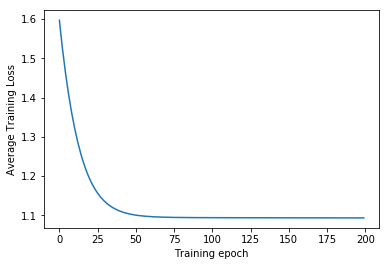

In [8]:
model = Model(neural_network, training_set, training_batch_size, learning_rate, num_epochs = 200,
             weight = class_weight, imbalanced_class = True)
model.train()

In [9]:
model.get_accuracy(test_loader)

0.5777089783281734

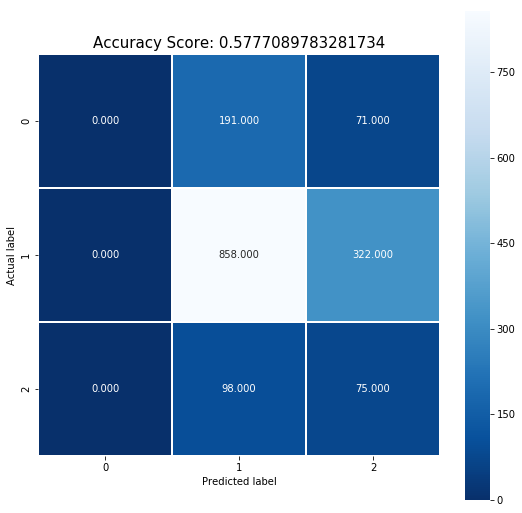

In [10]:
model.show_confusion_matrix(test_loader)

In [11]:
accuracy_map_per_class = model.get_accuracy_map_per_class(test_loader)

In [12]:
print(accuracy_map_per_class)

{1: 0.7271186440677966, 0: 0.0, 2: 0.43352601156069365}


In [13]:
dataset_divider = Binary_Even_Dataset_Reader(file_name, "excel")
training_dataset = dataset_divider.get_training_dataset()

training_dataset = dataset_divider.get_training_dataset()
class_weight = training_dataset.get_class_weight()
print(class_weight)

X_train, y_train = training_dataset.get_pytorch_data()
indices = [3, 4]
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

val_dataset = dataset_divider.get_validation_dataset()

X_val, y_val = val_dataset.get_pytorch_data()
X_val = X_val[:, indices]
print(X_val.shape)
print(y_val.shape)

test_dataset = dataset_divider.get_test_dataset()

X_test, y_test = test_dataset.get_pytorch_data()
X_test = X_test[:, indices]
print(X_test.shape)
print(y_test.shape)

{0: 7243, 1: 836}
tensor([1.0000, 1.0386], dtype=torch.float64)
torch.Size([1003, 2])
torch.Size([1003])
torch.Size([334, 2])
torch.Size([334])
torch.Size([334, 2])
torch.Size([334])


In [14]:
training_set = Pytorch_Dataset(X_train, y_train)
validation_set = Pytorch_Dataset(X_val, y_val)
test_set = Pytorch_Dataset(X_test, y_test)

training_batch_size = X_train.shape[0]
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.005

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

num_classes = (torch.max(y_train) + 1).item()
print(num_classes)
neural_network = Net1(len(indices), num_classes, hidden_layer_size = 3)

2


Training done!


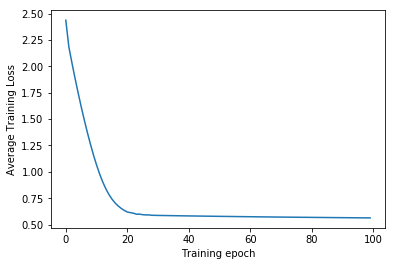

In [15]:
model = Model(neural_network, training_set, training_batch_size, learning_rate, num_epochs = 100,
             weight = class_weight, imbalanced_class = True)
model.train()

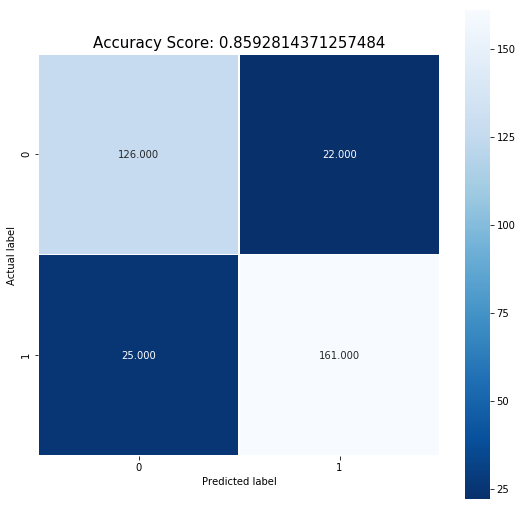

In [16]:
model.show_confusion_matrix(validation_loader)

In [17]:
accuracy_map_per_class = model.get_accuracy_map_per_class(validation_loader)
print(accuracy_map_per_class)

{0: 0.8513513513513513, 1: 0.8655913978494624}


In [18]:
model.get_model_statistics(validation_loader)

True Positive Rate:  0.8655913978494624
True Negative Rate:  0.8513513513513513
False Positive Rate:  0.14864864864864868
False Negative Rate:  0.13440860215053763
Precision :  0.8797814207650273
Recall :  0.8655913978494624
F1 Score :  0.872628726287263
Accuracy :  0.8592814371257484
